In [27]:
import pandas as pd
import requests
import matplotlib.pyplot as plt 
import altair as alt

In [2]:
url = "https://dgsaie.mise.gov.it/open_data_export.php?export-id=1&amp;export-type=csv"

In [4]:
# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the response content to a file
    with open('fuel_prices.csv', 'wb') as f:
        f.write(response.content)
    print('CSV file downloaded successfully.')
else:
    print('Failed to download CSV file.')

CSV file downloaded successfully.


In [16]:
fuel_prices = pd.read_csv('fuel_prices.csv', index_col=0)
fuel_prices = fuel_prices.iloc[:, 0:3]
fuel_prices = fuel_prices.rename(columns={'GASOLIO_AUTO':'DIESEL'})
fuel_prices = fuel_prices.div(1000)
fuel_prices.head()

,BENZINA,GASOLIO_AUTO,GPL
DATA_RILEVAZIONE,,,
2005-01-03,1.11575,1.01828,0.55250
2005-01-10,1.08800,1.00439,0.55257
2005-01-17,1.08814,1.00431,0.55188
2005-01-24,1.09001,1.00431,0.55188
2005-01-31,1.13211,1.02260,0.55188


In [17]:

fuel_prices.head()


,BENZINA,DIESEL,GPL
DATA_RILEVAZIONE,,,
2005-01-03,1.11575,1.01828,0.55250
2005-01-10,1.08800,1.00439,0.55257
2005-01-17,1.08814,1.00431,0.55188
2005-01-24,1.09001,1.00431,0.55188
2005-01-31,1.13211,1.02260,0.55188


In [13]:
fuel_prices.tail()

,BENZINA,GASOLIO_AUTO,GPL
DATA_RILEVAZIONE,,,
2023-02-20,1.86001,1.83658,0.80324
2023-02-27,1.85645,1.82171,0.80454
2023-03-06,1.85284,1.80906,0.80263
2023-03-13,1.85993,1.81258,0.80022
2023-03-20,1.85534,1.80180,0.79797


<Axes: xlabel='DATA_RILEVAZIONE'>

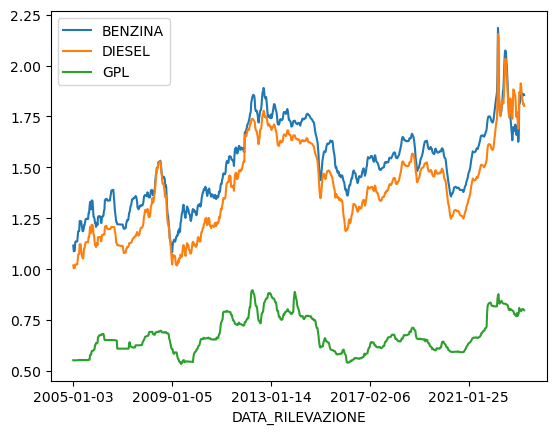

In [20]:
fuel_prices.plot()

In [32]:
# Melt the DataFrame to long format
fuel_prices['DATA'] = fuel_prices.index
df_melted = fuel_prices.melt(id_vars='DATA', var_name='series')

# Plot the time series using Altair
chart = alt.Chart(df_melted).mark_line().encode(
    x='DATA:T',
    y='value:Q',
    color='series:N'
)

# Show the plot
chart.show()

Displaying chart at http://localhost:64693/
